<a href="https://colab.research.google.com/github/FarizaNoushad/flower_classifier1/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow opencv-python matplotlib numpy pillow --quiet
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import zipfile

In [3]:
dataset_path = "/content/archive (3).zip"

In [4]:
extracted_path = "/content/flower_dataset"

if not os.path.exists(extracted_path):
    print(f"Extracting {dataset_path} to {extracted_path}...")
    # Add a check for the existence of the dataset file
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset file not found at {dataset_path}")
    else:
        try:
            with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
                zip_ref.extractall(extracted_path)
            print("Extraction complete.")
        except zipfile.BadZipFile:
            print(f"Error: The file at {dataset_path} is not a valid zip file or is corrupted.")
else:
    print(f"Dataset already extracted to {extracted_path}.")
if os.path.exists(extracted_path):
    categories = os.listdir(extracted_path)
    print("Flower categories:", categories)
else:
    print("Extraction failed. Cannot list categories.")

Extracting /content/archive (3).zip to /content/flower_dataset...
Extraction complete.
Flower categories: ['17FlowerOxfordDataset']


In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [7]:
import os

for root, dirs, files in os.walk("/content"):
    for d in dirs:
        print(os.path.join(root, d))


/content/.config
/content/flower_dataset
/content/sample_data
/content/.config/configurations
/content/.config/logs
/content/.config/logs/2025.06.25
/content/flower_dataset/17FlowerOxfordDataset
/content/flower_dataset/17FlowerOxfordDataset/windflower
/content/flower_dataset/17FlowerOxfordDataset/cowslip
/content/flower_dataset/17FlowerOxfordDataset/buttercup
/content/flower_dataset/17FlowerOxfordDataset/pansy
/content/flower_dataset/17FlowerOxfordDataset/tulip
/content/flower_dataset/17FlowerOxfordDataset/bluebell
/content/flower_dataset/17FlowerOxfordDataset/tiger lily
/content/flower_dataset/17FlowerOxfordDataset/fritillary
/content/flower_dataset/17FlowerOxfordDataset/crocus
/content/flower_dataset/17FlowerOxfordDataset/daffodil
/content/flower_dataset/17FlowerOxfordDataset/sunflower
/content/flower_dataset/17FlowerOxfordDataset/daisy
/content/flower_dataset/17FlowerOxfordDataset/snowdrop
/content/flower_dataset/17FlowerOxfordDataset/dandelion
/content/flower_dataset/17FlowerOxford

In [9]:
import os

dataset_extracted_path = "/content/flower_dataset"
train_dir = os.path.join(dataset_extracted_path, '17FlowerOxfordDataset')

# Check if the training directory exists and is not empty
if not os.path.exists(train_dir) or not os.listdir(train_dir):
    print(f"Error: Training directory not found or is empty: {train_dir}")
else:
    train_data = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        subset='training',
        class_mode='categorical'
    )

Found 1088 images belonging to 15 classes.


In [10]:
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Found 272 images belonging to 15 classes.


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [13]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

In [15]:
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2351 - loss: 2.5537

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.76103, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.2388 - loss: 2.5394 - val_accuracy: 0.7610 - val_loss: 0.9621
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6940 - loss: 1.0380
Epoch 2: val_accuracy improved from 0.76103 to 0.81985, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.6948 - loss: 1.0351 - val_accuracy: 0.8199 - val_loss: 0.5389
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7814 - loss: 0.6880
Epoch 3: val_accuracy improved from 0.81985 to 0.83456, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7818 - loss: 0.6866 - val_accuracy: 0.8346 - val_loss: 0.4872
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8108 - loss: 0.5306
Epoch 4: val_accuracy improved from 0.83456 to 0.85294, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8111 - loss: 0.5307 - val_accuracy: 0.8529 - val_loss: 0.4345
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8626 - loss: 0.4330
Epoch 5: val_accuracy improved from 0.85294 to 0.86029, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8628 - loss: 0.4325 - val_accuracy: 0.8603 - val_loss: 0.4083
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8823 - loss: 0.3654
Epoch 6: val_accuracy improved from 0.86029 to 0.86765, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8825 - loss: 0.3649 - val_accuracy: 0.8676 - val_loss: 0.3730
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9067 - loss: 0.3082
Epoch 7: val_accuracy improved from 0.86765 to 0.87500, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.9065 - loss: 0.3089 - val_accuracy: 0.8750 - val_loss: 0.3222
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8879 - loss: 0.3122
Epoch 8: val_accuracy improved from 0.87500 to 0.90441, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8884 - loss: 0.3117 - val_accuracy: 0.9044 - val_loss: 0.3245
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9073 - loss: 0.2730
Epoch 9: val_accuracy did not improve from 0.90441
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9076 - loss: 0.2724 - val_accuracy: 0.8897 - val_loss: 0.3173
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9159 - loss: 0.2640
Epoch 10: val_accuracy improved from 0.90441 to 0.91544, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9158 - loss: 0.2642 - val_accuracy: 0.9154 - val_loss: 0.2776
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9163 - loss: 0.2510
Epoch 11: val_accuracy did not improve from 0.91544
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9165 - loss: 0.2504 - val_accuracy: 0.9007 - val_loss: 0.2856
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9198 - loss: 0.2269
Epoch 12: val_accuracy improved from 0.91544 to 0.92279, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9198 - loss: 0.2268 - val_accuracy: 0.9228 - val_loss: 0.3267
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9329 - loss: 0.2077
Epoch 13: val_accuracy did not improve from 0.92279
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9331 - loss: 0.2074 - val_accuracy: 0.8824 - val_loss: 0.3568
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9425 - loss: 0.1747
Epoch 14: val_accuracy did not improve from 0.92279
34/34 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9423 - loss: 0.1749 - val_accuracy: 0.8934 - val_loss: 0.3282
Epoch 15/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9477 - loss: 0.1653
Epoch 15: val_accuracy improved from 0.92279 to 0.93015, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9479 - loss: 0.1650 - val_accuracy: 0.9301 - val_loss: 0.2733
Epoch 16/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9471 - loss: 0.1824
Epoch 16: val_accuracy did not improve from 0.93015
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9470 - loss: 0.1823 - val_accuracy: 0.9044 - val_loss: 0.3349
Epoch 17/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9351 - loss: 0.1933
Epoch 17: val_accuracy improved from 0.93015 to 0.94118, saving model to best_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9353 - loss: 0.1927 - val_accuracy: 0.9412 - val_loss: 0.2373
Epoch 18/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9602 - loss: 0.1227
Epoch 18: val_accuracy did not improve from 0.94118
34/34 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9601 - loss: 0.1231 - val_accuracy: 0.9301 - val_loss: 0.2601
Epoch 19/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9545 - loss: 0.1557
Epoch 19: val_accuracy did not improve from 0.94118
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9545 - loss: 0.1555 - val_accuracy: 0.9228 - val_loss: 0.2831
Epoch 20/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9474 - loss: 0.1273
Epoch 20: val_accuracy did not improve from 0.94118
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9473 - loss: 0.1277 - val_accuracy: 0.9412 - val_loss: 0.2651
Restoring model weights from the end of the best epoch: 17.


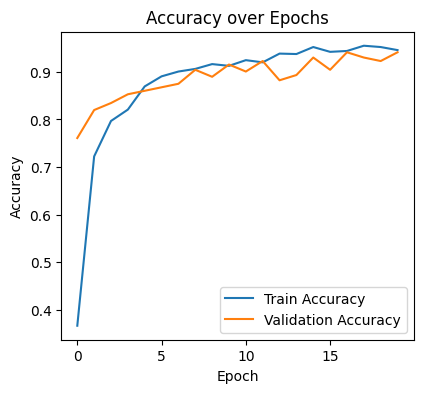

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


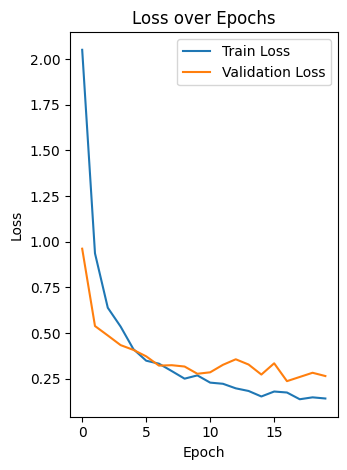

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:

val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9327 - loss: 0.3075
Validation Accuracy: 94.49%


In [23]:
pred_probs = model.predict(val_data)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())


9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


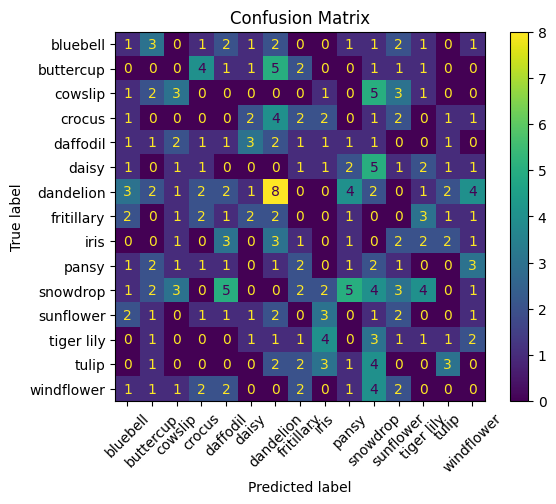

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [25]:

print("Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))


Classification Report:

              precision    recall  f1-score   support

    bluebell       0.07      0.06      0.06        16
   buttercup       0.00      0.00      0.00        16
     cowslip       0.21      0.19      0.20        16
      crocus       0.00      0.00      0.00        16
    daffodil       0.05      0.06      0.06        16
       daisy       0.00      0.00      0.00        17
   dandelion       0.25      0.25      0.25        32
  fritillary       0.00      0.00      0.00        16
        iris       0.00      0.00      0.00        16
       pansy       0.06      0.06      0.06        16
    snowdrop       0.12      0.12      0.12        32
   sunflower       0.10      0.13      0.11        15
  tiger lily       0.06      0.06      0.06        16
       tulip       0.25      0.19      0.21        16
  windflower       0.00      0.00      0.00        16

    accuracy                           0.09       272
   macro avg       0.08      0.08      0.08       272
we

In [26]:
from tensorflow.keras.metrics import top_k_categorical_accuracy

def top_k_accuracy(y_true, y_pred, k=3):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=k).numpy().mean()
val_data.reset()
y_true = tf.keras.utils.to_categorical(val_data.classes, num_classes=len(class_labels))
top3_acc = top_k_accuracy(y_true, pred_probs, k=3)
print(f"Top-3 Accuracy: {top3_acc * 100:.2f}%")


Top-3 Accuracy: 22.06%


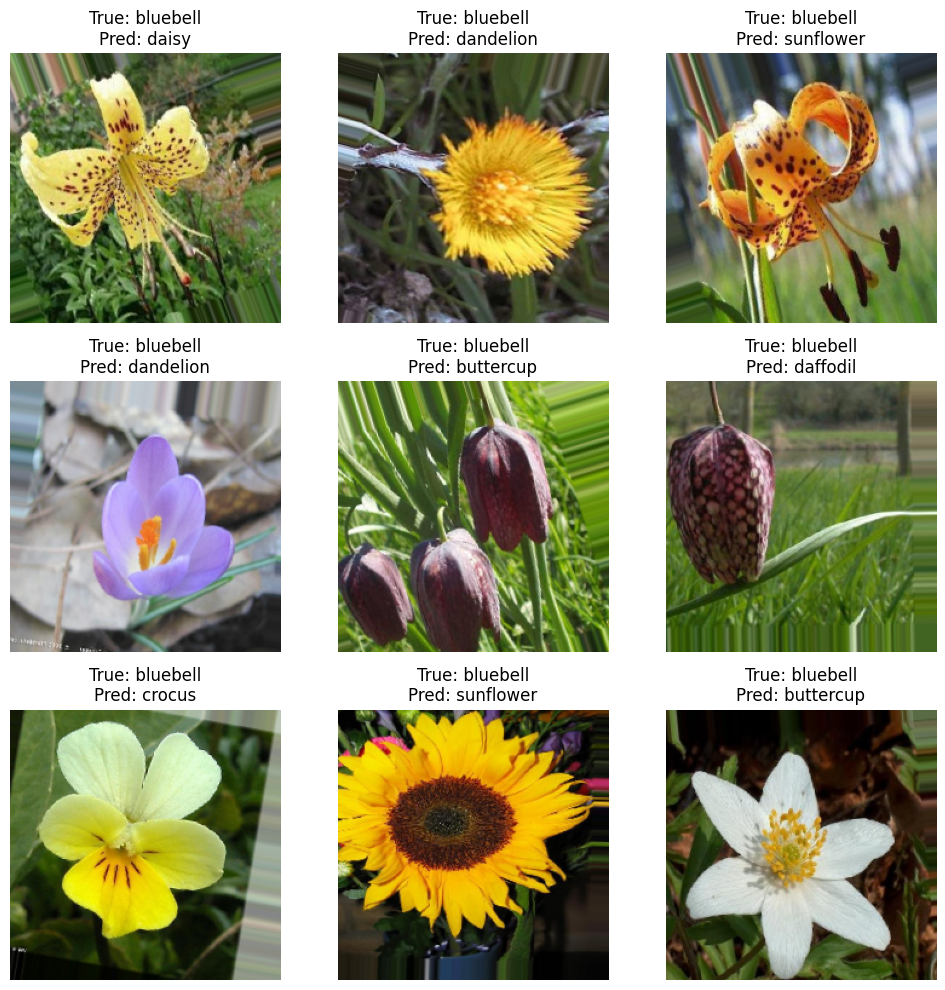

In [27]:
import numpy as np
import matplotlib.pyplot as plt
val_data.reset()
total_val_samples = len(val_data.filenames)
all_images = []
all_labels = []

for i in range(len(val_data)):
    img_batch, label_batch = val_data[i]
    all_images.append(img_batch)
    all_labels.append(np.argmax(label_batch, axis=1))
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

misclassified_idx = np.where(pred_classes != true_classes)[0]

misclassified_images = all_images[misclassified_idx]
misclassified_true_labels = true_classes[misclassified_idx]
misclassified_predicted_labels = pred_classes[misclassified_idx]

plt.figure(figsize=(10, 10))

for i in range(min(9, len(misclassified_idx))):
    img = misclassified_images[i]
    true_label_idx = misclassified_true_labels[i]
    predicted_label_idx = misclassified_predicted_labels[i]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_label_idx]}\nPred: {class_labels[predicted_label_idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

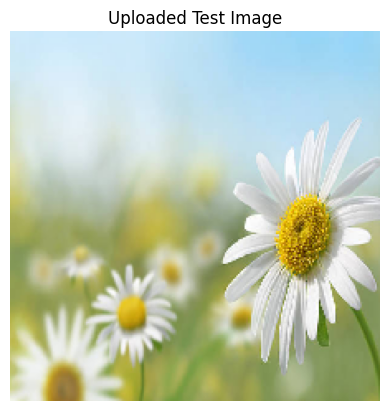

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path = "/content/F.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded Test Image")
plt.show()
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [30]:
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = list(train_data.class_indices.keys())
print("Predicted Flower Category:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Flower Category: daisy


In [32]:
model=model.save('/content/best_model.h5')

In [35]:
from google.colab import files
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>